# **Assignment 2**

## Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gene.tsv", sep='\t', index_col=0)

In [3]:
# gather info on our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37779 entries, Gnai3 to 4930524O05Rik
Columns: 307 entries, SRR8477377 to SRR8477710
dtypes: float64(307)
memory usage: 88.8+ MB


In [4]:
# overview of the first five rows of our dataframe
df.head()

,SRR8477377,SRR8477378,SRR8477379,SRR8477380,SRR8477381,SRR8477383,SRR8477384,SRR8477385,SRR8477386,SRR8477387,...,SRR8477701,SRR8477702,SRR8477703,SRR8477704,SRR8477705,SRR8477706,SRR8477707,SRR8477708,SRR8477709,SRR8477710
gene,,,,,,,,,,,,,,,,,,,,,
Gnai3,6.003730,6.717884,5.879887,6.126242,6.911103,6.647521,6.415873,6.061517,6.073213,6.198332,...,9.713097,12.408170,11.925100,11.796491,11.335134,12.397634,13.405191,9.369862,12.053689,13.110332
Pbsn,0.157460,0.153849,0.154648,0.150461,0.150191,0.149977,0.147436,0.146877,0.147456,0.149704,...,0.324236,0.330234,0.328160,0.311731,0.315161,0.320094,0.319713,0.320536,0.318293,0.316961
Cdc45,1.660414,2.025149,1.638161,2.320365,1.705641,2.326299,2.125218,2.190152,2.139593,1.537633,...,2.460072,3.078061,3.840317,2.857121,3.299295,2.962622,4.512856,3.729228,2.972924,4.147524
H19,1.151994,1.616525,1.570316,0.150461,0.749839,0.149977,1.063427,1.511052,1.439036,1.091345,...,3.725690,3.331363,4.060742,2.495034,2.502888,2.530673,3.038688,0.320536,2.522001,0.316961
Scml2,1.369270,0.153849,1.320171,1.523063,1.658413,1.358042,1.617542,1.463084,2.519570,2.724351,...,2.023284,2.076867,0.328160,1.909401,1.937866,0.320094,4.735587,4.830414,4.890850,5.219754


In [5]:
# check how many unique genes we have
df.index.nunique()

37742

Text(0.5, 1.0, 'Per-gene Median Expression Ranges Density Plot')

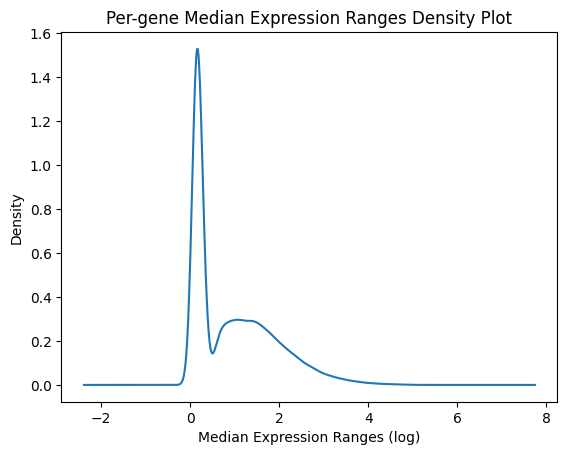

In [6]:
# log-scale our data
df_log = np.log1p(df)
# get per-gene median expression ranges
log_median_expression = df_log.median(axis=1)
# plot the median expression ranges:
log_median_expression.plot.density()
plt.xlabel('Median Expression Ranges (log)')
plt.title('Per-gene Median Expression Ranges Density Plot')

## Part 1 **Answer**

Our gene matrix has 37779 rows with 307 columns. We have 37742 unique genes. From the Density plot shown above, we can see that most of our genes have little expression (first peak). The second peak shows that a sizeable amount has medium expression. Few genes have very high expression, forming the long tail we see to the right of the second peak.

## Part 2

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# load metadata into a dataframe
metadata = pd.read_csv("RefineBioDataset\\SRP181622\\metadata_SRP181622.tsv", sep='\t', index_col=0)

In [9]:
# transpose our data
df_transpose = df.T

In [10]:
# create a list to hold if a sample type (Control or Stress)
sample_type = []
for sample in metadata.index:
    if (sample in df_transpose.index):
        if ('Control' in metadata['refinebio_title'][sample]):
            sample_type.append('Control')
        else:
            sample_type.append('Stress')

In [11]:
# scale our data
scaled_data = df_transpose.loc[:, df_transpose.columns].values
scaled_data = StandardScaler().fit_transform(scaled_data)

In [12]:
# create our PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [13]:
# create PCA dataframe
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"], index=df_transpose.index)
pca_df['Group'] = sample_type #add group column to dataframe
pca_df

,PC1,PC2,Group
SRR8477377,-70.216586,-26.556268,Control
SRR8477378,-72.791696,-25.253102,Control
SRR8477379,-72.873541,-25.299707,Control
SRR8477380,-79.368934,-0.559724,Control
SRR8477381,-79.600030,-0.695143,Control
...,...,...,...
SRR8477706,205.077291,-4.263424,Stress
SRR8477707,205.317975,-4.238517,Stress
SRR8477708,204.466730,-5.868167,Stress
SRR8477709,204.328440,-5.352698,Stress


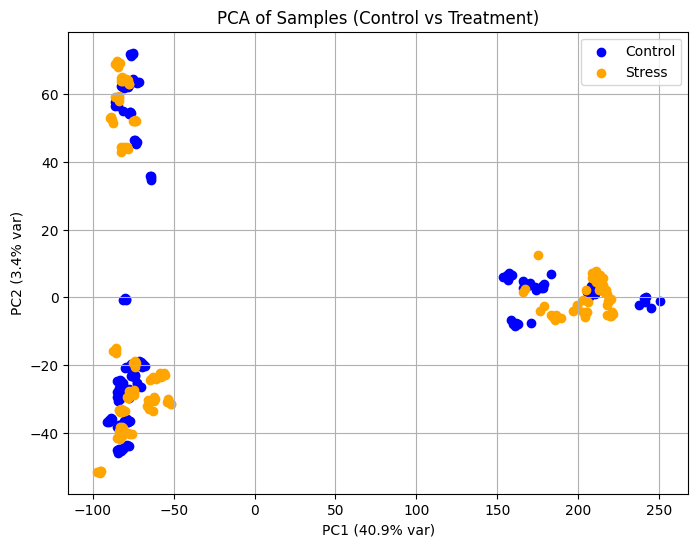

In [14]:
plt.figure(figsize=(8,6))
colors = {"Control": "blue", "Stress": "orange"}

for group, subset in pca_df.groupby("Group"):
    plt.scatter(subset["PC1"], subset["PC2"], label=group, c=colors[group])

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of Samples (Control vs Treatment)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#T-SNE plot 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
#Load data 
# load metadata into a dataframe
metadata = pd.read_csv("RefineBioDataset\\SRP181622\\metadata_SRP181622.tsv", sep='\t', index_col=0)

In [17]:
# transpose our data
df_transpose = df.T

In [18]:
sample_type = []
for sample in metadata.index:
    if (sample in df_transpose.index):
        if ('Control' in metadata['refinebio_title'][sample]):
            sample_type.append('Control')
        else:
            sample_type.append('Stress')

In [19]:
# scale our data
scaled_data = df_transpose.loc[:, df_transpose.columns].values
scaled_data = StandardScaler().fit_transform(scaled_data)

In [20]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(scaled_data)

In [21]:
# create T-SNE dataframe
tsne_df = pd.DataFrame(data=tsne_results, columns=["TSNE1", "TSNE2"], index=df_transpose.index)
tsne_df['Group'] = sample_type #add group column to dataframe
tsne_df

,TSNE1,TSNE2,Group
SRR8477377,1.307625,-18.492514,Control
SRR8477378,1.225995,-18.476130,Control
SRR8477379,1.329324,-18.482496,Control
SRR8477380,9.012699,-23.009048,Control
SRR8477381,8.831641,-23.120502,Control
...,...,...,...
SRR8477706,-22.262007,26.644035,Stress
SRR8477707,-22.041903,26.873846,Stress
SRR8477708,-22.476662,26.838591,Stress
SRR8477709,-22.145113,27.096365,Stress


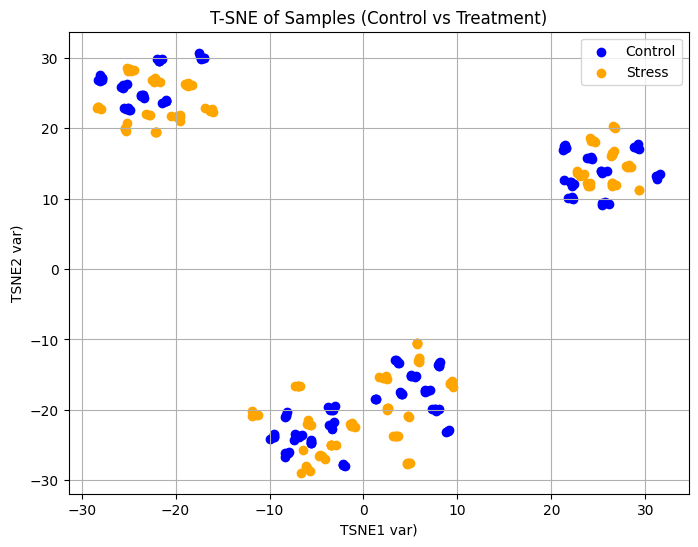

In [22]:
# Using Matplotlib
plt.figure(figsize=(8, 6))
colors = {"Control": "blue", "Stress": "orange"}

for group, subset in tsne_df.groupby("Group"):
    plt.scatter(subset["TSNE1"], subset["TSNE2"], label=group, c=colors[group])

plt.xlabel(f"TSNE1 var)") #({tsne.explained_variance_ratio_[0]*100:.1f}% 
plt.ylabel(f"TSNE2 var)") #({tsne.explained_variance_ratio_[1]*100:.1f}%
plt.title("T-SNE of Samples (Control vs Treatment)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import umap 
import matplotlib.pyplot as plt
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\amuel\PycharmProjects\Frontend\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


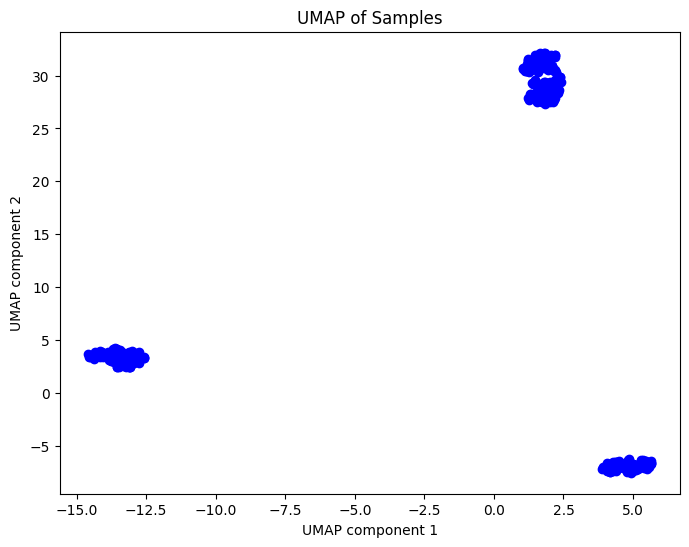

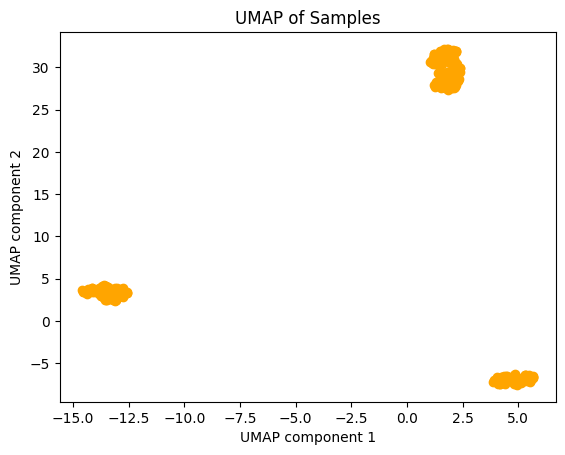

In [24]:
data = scaled_data 
labels = sample_type
umap_model = umap.UMAP(n_components = 2, random_state = 42,) 
embedding = umap_model.fit_transform(data)

plt.figure(figsize = (8,6))
colors = {"Control" : "blue", "Stress" : "orange"}

for group, subset in pca_df.groupby("Group"): 
    plt.scatter(embedding[:,0], embedding[:,1],label = group, c= colors[group])
    plt.title('UMAP of Samples')
    plt.xlabel('UMAP component 1')
    plt.ylabel('UMAP component 2')
    plt.show()